# Parsing Historical Data using `layoutparser`

requires GCV account and downloaded key. To do so, set up GCP at [link](https://console.cloud.google.com/) and download a credential.

In [1]:
import layoutparser as lp

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import cv2

Population table from 1951 Indian Census (bloated scanned pdfs - `tabula` etc fail here)

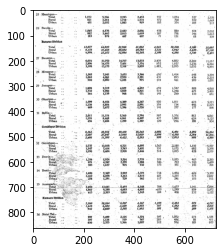

In [2]:
image = cv2.imread('UP_census_51.png')
plt.imshow(image);

In [6]:
ocr_agent = lp.GCVAgent.with_credential(
        "/home/alal/Dropbox/keys/spatial-acumen-244921-d9e9be61adfb.json", 
                                        languages = ['en'])
res = ocr_agent.detect(image, return_response=True)

In [ ]:
res

In [ ]:
texts  = ocr_agent.gather_text_annotations(res)
    # collect all the texts without coordinates
layout = ocr_agent.gather_full_text_annotation(res, agg_level=lp.GCVFeatureType.WORD)
    # collect all the layout elements of the `WORD` level

###  tesseract setup

alternatively, use the tesseract API https://layout-parser.readthedocs.io/en/latest/api_doc/ocr.html#tesseract-ocr-api

In [9]:
ocr_agent2 = lp.TesseractAgent()
res2 = ocr_agent2.detect(image, return_response=True)

In [16]:
tes_out = ocr_agent2.detect(image, return_response = True)
dir(tes_out)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [19]:
tes_out['text']

'25 Hamirpur—\n‘Total\n\n& a Soe eee’ ey 31 1074 gar dis16\nBort, Sane +e ate ‘8 3a, Tega\nUrn 2 a Yoon 308 15 ae 185 st\n26° Banda ;\n‘Tota 10654536 aan. 2056 458 289 41 2002\nRaval 32. 362 30s eas 5B Bas iB\nUrban 2! ee ‘0 cco ‘7 7 Br 3 53\n‘Basaras Dison :\nTotal. 1307 bho 31082-4841 ta230, sdb as.08\nHerat 1. Bite ees aie Bi Sa SoBe\nTron 17 aie. B82 i: a ae 7 re\n27 Bonncas— : :\n- ‘otal 00121950 1303324354882 269” ay57\nBomt Px mnt atte pie, cleat ase eles\nUrben Bios i Bas 1483, 2558711083? Ror\n8 Mireapur— ¥\neee oo) 15657081 3366 oa 683.204\n: Boral tos Met 231 21 355 $203\n5 Othe 5002080 05 29 aa 2 oat\nSa .\n2 nh tal 189g aan ate bar 3084050\nRural tse. Gm S859 Sat Sig 2a & 3403\nUrban oe cr is 9 133 i\nGhosipe— :\noa as. 556° 43a. ater scoot 23.33\nRural 2 iii3o 53884 2993. 2991. 359 34 446 2205 |\nUrban 40- Be 6 Tas iat ia i” 338\nBalle \' ae\nFate . na nase 5360 588 sr 316 82 40a\nBaral to Wiss Tags net Sor aes a. Str\nUiben a re er 120 296 i\nGoraktpit Division : ; :\né 

In [20]:
tes_out['data']

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,727,862,-1.000000,
1,2,1,1,0,0,0,12,12,83,20,-1.000000,
2,3,1,1,1,0,0,12,12,83,20,-1.000000,
3,4,1,1,1,1,0,12,12,83,11,-1.000000,
4,5,1,1,1,1,1,12,13,11,9,50.772995,25
...,...,...,...,...,...,...,...,...,...,...,...,...
440,5,1,13,1,1,4,410,826,31,28,68.099442,"4,007"
441,5,1,13,1,1,5,490,825,20,28,79.267822,312.
442,5,1,13,1,1,6,558,834,17,10,74.556152,356
443,5,1,13,1,1,7,629,826,20,28,82.198547,185


## Detection

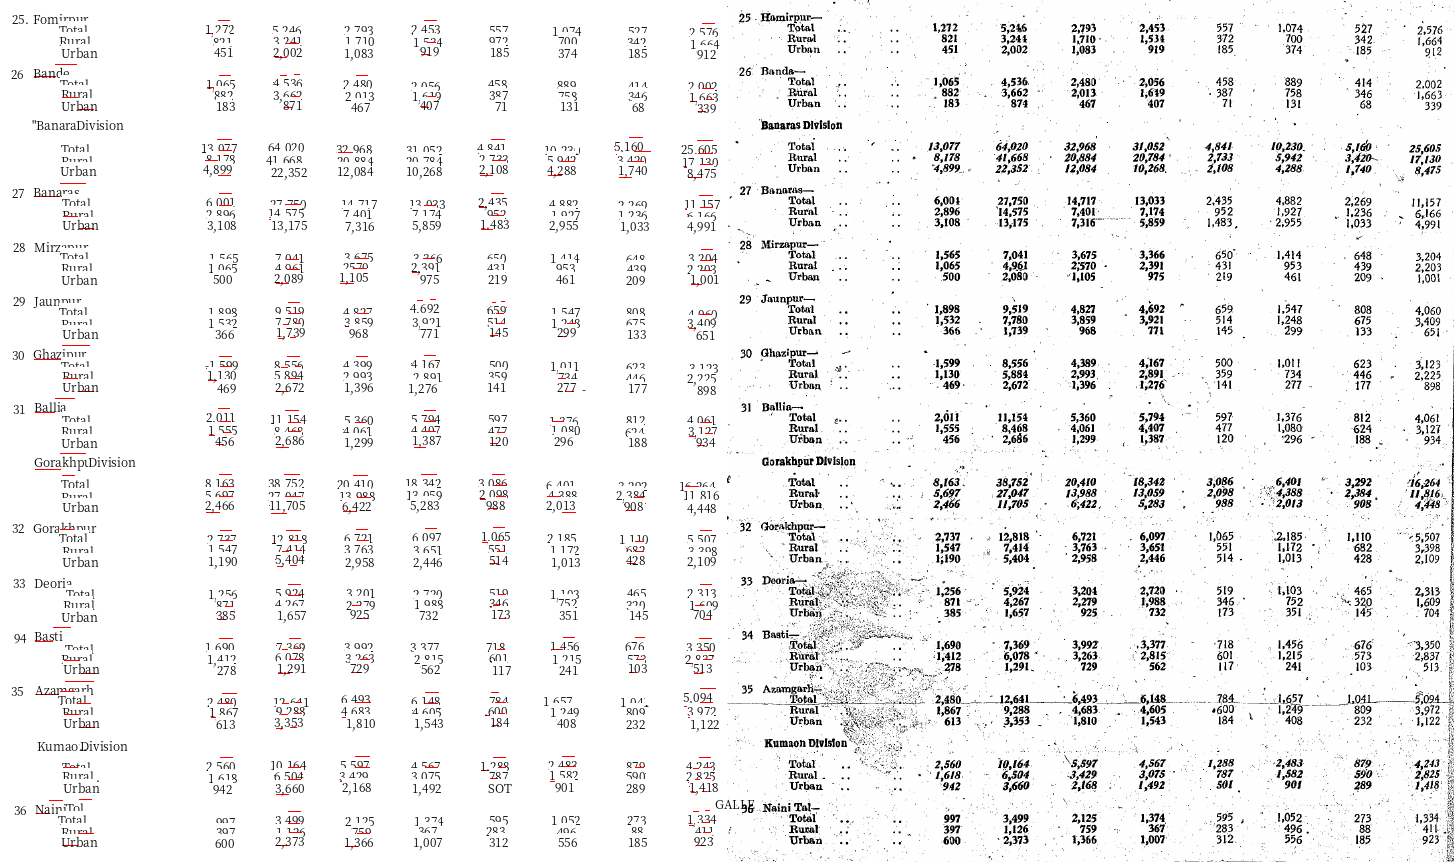

In [6]:
lp.draw_text(image, layout, font_size=12, with_box_on_text=True,
             text_box_width=1)

## location

This involves labelling a rectangle around columns of interest. Coordinates can be obtained by opening the image in an image editor like GIMP or [pinta](https://www.pinta-project.com/howto/installing-pinta).

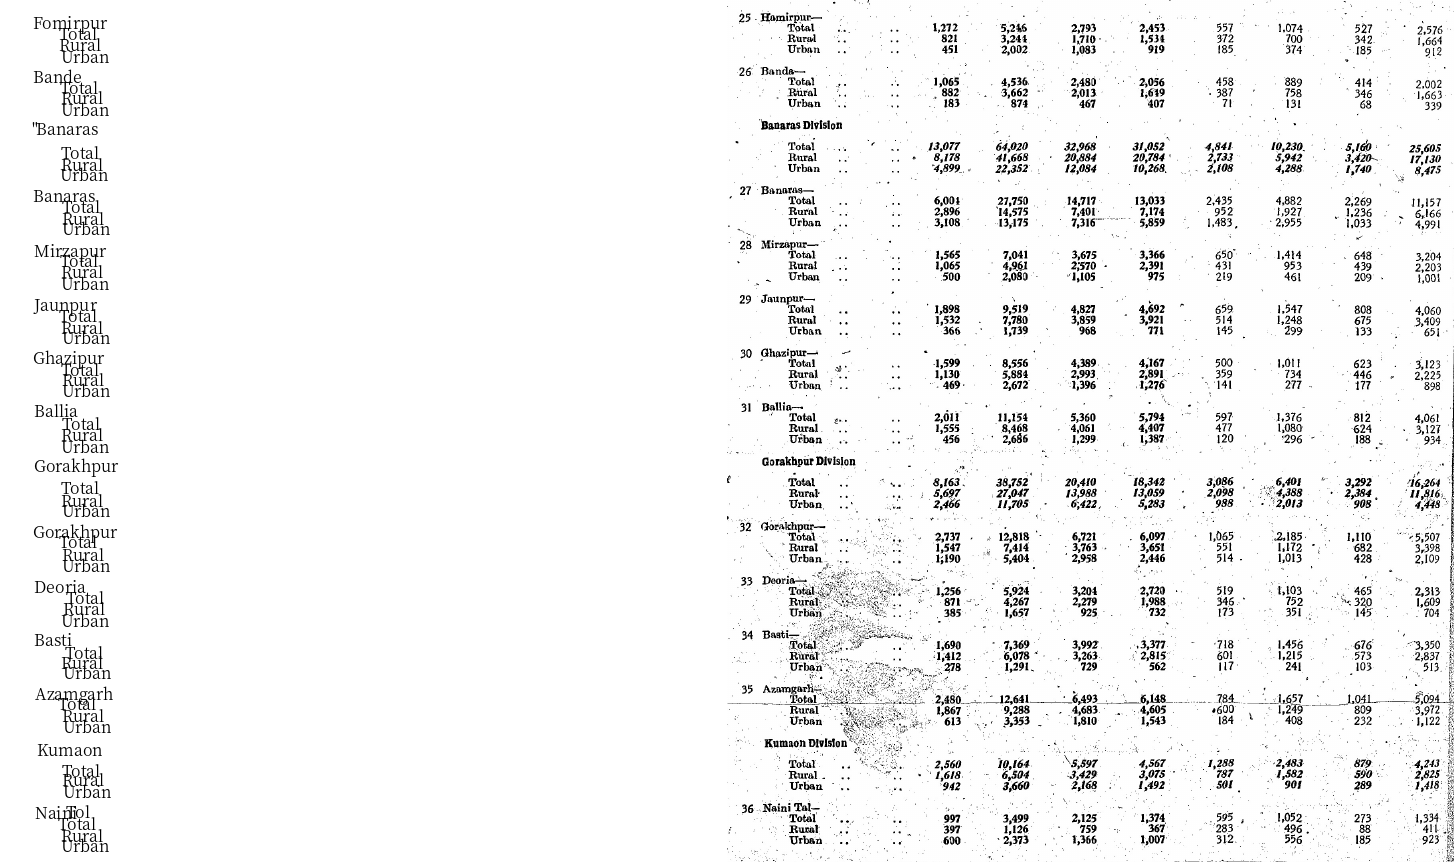

In [7]:
filter_residence = layout.filter_by(
    lp.Rectangle(x_1= 30, y_1= 5, x_2 = 103, y_2=850)
)
lp.draw_text(image, filter_residence, font_size=16)

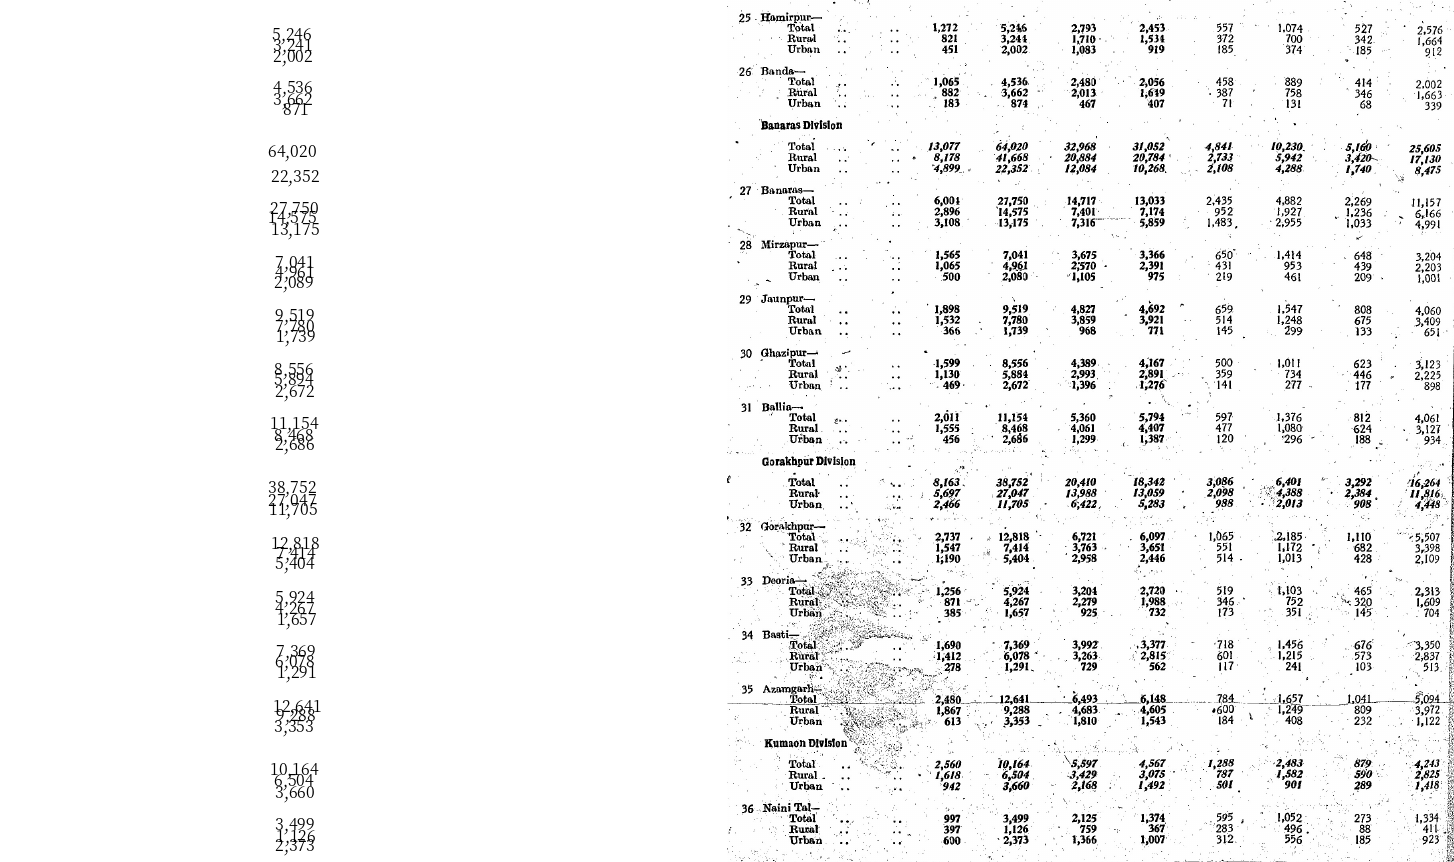

In [8]:
filter_population = layout.filter_by(
    lp.Rectangle(x_1= 268, y_1= 14, x_2 = 305, y_2=850)
)
lp.draw_text(image, filter_population, font_size=16)

## processing

In [9]:
locs  = [f.text for f in filter_residence if len(f.text) > 1]
popns = [f.text for f in filter_population]

###  grunt work
delete two aggregate division rows and cleanup.

In [10]:
locs[0] = "Hamirpur"
locs.remove('Tol')
locs

['Hamirpur',
 'Total',
 'Rural',
 'Urban',
 'Bande',
 'Total',
 'Rural',
 'Urban',
 'Banaras',
 'Total',
 'Rural',
 'Urban',
 'Banaras',
 'Total',
 'Rural',
 'Urban',
 'Mirzapur',
 'Total',
 'Rural',
 'Urban',
 'Jaunpur',
 'Total',
 'Rural',
 'Urban',
 'Ghazipur',
 'Total',
 'Rural',
 'Urban',
 'Ballia',
 'Total',
 'Rural',
 'Urban',
 'Gorakhpur',
 'Total',
 'Rural',
 'Urban',
 'Gorakhpur',
 'Total',
 'Rural',
 'Urban',
 'Deoria',
 'Total',
 'Rural',
 'Urban',
 'Basti',
 'Total',
 'Rural',
 'Urban',
 'Azamgarh',
 'Total',
 'Rural',
 'Urban',
 'Kumaon',
 'Total',
 'Rural',
 'Urban',
 'Naini',
 'Total',
 'Rural',
 'Urban']

In [11]:
loc2 = []
d = ""
for f in locs:
    if f not in ['Total', 'Rural', 'Urban']:
        d = f
    else:
        loc2.append(d + '_' + f)
loc2[:10]

['Hamirpur_Total',
 'Hamirpur_Rural',
 'Hamirpur_Urban',
 'Bande_Total',
 'Bande_Rural',
 'Bande_Urban',
 'Banaras_Total',
 'Banaras_Rural',
 'Banaras_Urban',
 'Banaras_Total']

In [12]:
# drop aggregate division rows
locs3 = [
    loc2[0:loc2.index('Banaras_Total')],
    loc2[loc2.index('Banaras_Urban')+1: loc2.index('Gorakhpur_Total')],
    loc2[loc2.index('Gorakhpur_Urban')+1:]
]
locs3 = sum(locs3, [])
locs3[:10]

['Hamirpur_Total',
 'Hamirpur_Rural',
 'Hamirpur_Urban',
 'Bande_Total',
 'Bande_Rural',
 'Bande_Urban',
 'Banaras_Total',
 'Banaras_Rural',
 'Banaras_Urban',
 'Mirzapur_Total']

In [13]:
pop2 = [
    popns[0:loc2.index('Banaras_Total')],
    popns[loc2.index('Banaras_Urban'): loc2.index('Gorakhpur_Total')-1],
    popns[popns.index('11,705')+1:]
]
pop2 = sum(pop2, [])
pop2[:10]

['5,246',
 '3,241',
 '2,002',
 '4,536',
 '3,662',
 '871',
 '27,750',
 '14,575',
 '13,175',
 '7,041']

In [14]:
print(len(locs3))
print(len(pop2))

39
39


## convert to df

In [ ]:
data_dict = dict(zip(locs3, pop2))
df = pd.DataFrame.from_dict(data_dict, orient='index').reset_index()
df